<a href="https://colab.research.google.com/github/ash030889/Portfolio_projects/blob/main/Real_estate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step - 1 Import the important libraries for the projects.
Here, we import numpy and pandas for loading and reading dataset and we import matplotlib.pyplot and seaborn for visualization.

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

#Step - 2 Data Gathering / Data Loading

In [142]:
data = pd.read_csv('/content/Housing.csv')

#Step - 3 Data preprocessing / Data Cleaning

In [143]:
data.info() #getting all information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [144]:
data.head() #get top 5 rows values.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [145]:
pd.isnull(data) #get null value if present.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [146]:
#Categorical data change into numeric form.
data['mainroad'] = data['mainroad'].apply({'no' : 0, 'yes' : 1}.get)
data['guestroom'] = data['guestroom'].apply({'no' : 0, 'yes' : 1}.get)
data['basement'] = data['hotwaterheating'].apply({'no' : 0, 'yes' : 1}.get)
data['hotwaterheating'] = data['hotwaterheating'].apply({'no' : 0, 'yes' : 1}.get)
data['airconditioning'] = data['airconditioning'].apply({'no' : 0, 'yes' : 1}.get)
data['prefarea'] = data['prefarea'].apply({'no' : 0, 'yes' : 1}.get)
data['furnishingstatus'] = data['furnishingstatus'].apply({'furnished' : 1, 'semi-furnished' : 2, 'unfurnished' : 3}.get)

In [147]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,0,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,0,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,0,0,1,2,0,1


#Step - 4 Visualization of Dataset.
Bar chart - price between furnishingstatus.(top-20 rows)
here furnishingstatus means 1 = furnished, 2 = semi-furnished, 3 = unfurnished house

<Axes: ylabel='furnishingstatus'>

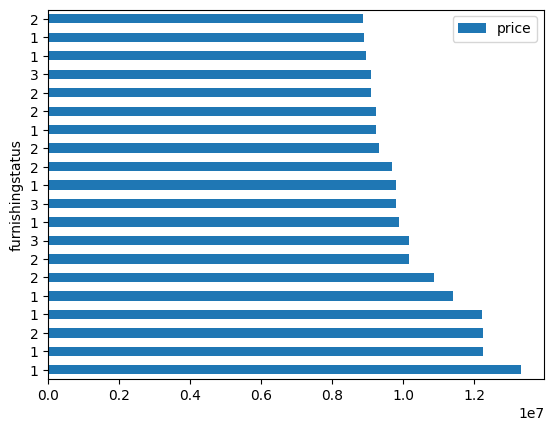

In [184]:
data[0:20].plot(x = 'furnishingstatus', y = 'price' , kind = 'barh')

In this chart we can see in top 20 rows data most of the house price is high which house is furnished compared to semi-furnished, unfurnished.

bar chart - area between price. (top - 20 rows)

<Axes: xlabel='area'>

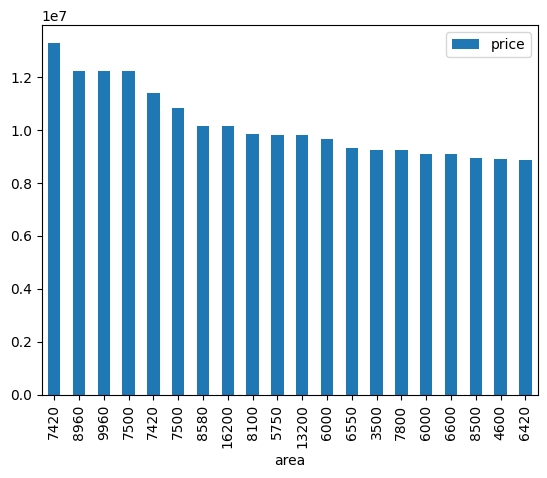

In [170]:
data[0:20].plot(x = 'area', y = 'price', kind = 'bar')

In this chart (top 20 rows) we can see price of house is not depend on area of house.

#Step - 5 Clean Data divide into x (independent) and y (dependent).

In [148]:
x = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

#step - 6 Clean data split into train_set and test_test

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75)

#Step - 7 Using Linear Regression MLM

In [150]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [151]:
regression.fit(x_train, y_train)

LinearRegression()

In [152]:
prediction = regression.predict(x_test)

In [153]:
print(prediction)

[4747736.64756777 3429741.72129933 6629597.46808792 2224509.14212681
 4400911.69157108 2697330.77500537 4402265.9827084  5235909.96825068
 3730490.20421306 7056475.96998226 4076973.93519984 3126287.46782678
 4898036.44140483 5394714.85296616 2662227.83768236 5014038.28187805
 3778178.95676558 2617830.85955017 3794025.21617636 4451908.78648715
 5507988.08543947 6669354.19749096 3578565.88633214 3294226.43971177
 5008222.63592078 3512483.01149538 2295363.57270261 4773235.73547891
 5393552.76819939 3682189.46574921 4140587.68106957 4021985.50630388
 2953471.13817448 3145312.04324738 3849046.01849139 4754720.39099243
 3129401.06429783 8260256.10317995 4520859.54352752 6142359.54068366
 3308042.27682531 2934874.41331306 3299853.20101016 3312691.9397078
 5488493.81760808 6083493.96570853 4170108.77792999 2654999.49990891
 3068141.66720647 3952355.65014835 6411465.61438252 2811886.11998303
 3833263.90432919 3872199.06536466 6316798.59338592 7809178.22685796
 2788361.86195294 5068268.76352739 

#Linear Regression MLM accuracy score

In [154]:
regression.score(x,y)

0.6722379988110196

in the LinearRegression model we can see that acurracy obtained is 67% which is not very good so we can try another models than we can get better accuracy.

#Using Dicision Tree MLM

In [155]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [156]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [158]:
d_prediction = tree_model.predict(x_test)

#Dicision Tree MLM accuracy score

In [159]:
tree_model.score(x,y)

0.8228027147157919

here we used Decision Tree model we can see that acurracy obtained is 82% which is quite good but we can also try another models to get better accuracy or not.

#Using Random Forest MLM

In [160]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

In [161]:
forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [162]:
f_prediction = forest_model.predict(x_test)

#Random Forest MLM accuracy score

In [163]:
forest_model.score(x,y)

0.8635326558709663

#Conlusion:
here we used Random Forest model we can see that acurracy obtained is 86% which is quite good. we used three model and realised Random Forest MLM is better than another two model for this housinng dataset.

#Enter the new dataset for predict the house price.

In [173]:
new_data = {'area' : 7500, 'bedrooms' : 5, 'bathrooms' : 5, 'stories' : 4, 'mainroad' : 0, 'guestroom' : 1, 'basement' : 1, 'hotwaterheating' : 1, 'airconditioning' : 1, 'parking' : 1, 'prefarea' : 1, 'furnishingstatus' : 1}
index = [1]
df = pd.DataFrame(new_data, index)
print(df)

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
1  7500         5          5        4         0          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
1                1                1        1         1                 1  


In [174]:
new_prediction = forest_model.predict(df)

In [175]:
print(new_prediction)

[9437785.]
